## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
final_table= pd.merge(mouse_metadata,study_results,on= "Mouse ID")
# Display the data table for preview

final_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Optional: Get all the data for the duplicate mouse ID. 



In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [4]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


In [7]:
drug_df= final_table[["Tumor Volume (mm3)","Drug Regimen"]]
drug_df= drug_df.groupby("Drug Regimen")
drug_df= drug_df.describe()
drug_df

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  161.0  52.322552  6.507770  45.000000  47.081086   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.854632  56.184664  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar and Pie Charts

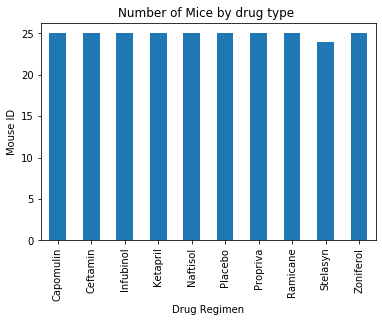

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
final_table.head()
mouse_count= final_table.groupby('Drug Regimen')
mouse_count= mouse_count['Mouse ID'].nunique()
mouse_chart= mouse_count.plot(kind='bar')

plt.title("Number of Mice by drug type ")
mouse_chart.set_ylabel("Mouse ID")
mouse_chart.set_xlabel("Drug Regimen")

plt.show()

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [10]:
drug_data= final_table.loc[final_table['Timepoint'] ==45]
drug_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


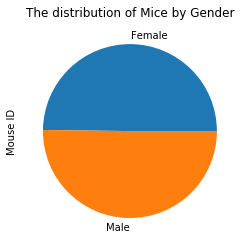

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count= final_table.groupby('Sex')
gender_count= gender_count.nunique()
gender_count= gender_count["Mouse ID"]
gender_chart= gender_count.plot(kind='pie')
plt.title("The distribution of Mice by Gender")
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_data= drug_data.loc[drug_data['Timepoint'] ==45]
drug_data= final_table.loc[final_table['Drug Regimen'] =='Capomulin',['Drug Regimen','Mouse ID','Weight (g)','Tumor Volume (mm3)','Timepoint']]
drug_ramicane= final_table.loc[final_table['Drug Regimen'] =='Ramicane',['Drug Regimen','Mouse ID','Weight (g)','Tumor Volume (mm3)','Timepoint']]
drug_infubinol= final_table.loc[final_table['Drug Regimen'] =='Infubinol',['Drug Regimen','Mouse ID','Weight (g)','Tumor Volume (mm3)','Timepoint']]
drug_ceftamin= final_table.loc[final_table['Drug Regimen'] =='Ceftamin',['Drug Regimen','Mouse ID','Weight (g)','Tumor Volume (mm3)','Timepoint']]
drug_ceftamin


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Weight (g),Tumor Volume (mm3),Timepoint
484,Ceftamin,a275,28,45.000000,0
485,Ceftamin,a275,28,46.795257,5
486,Ceftamin,a275,28,47.371343,10
487,Ceftamin,a275,28,49.734404,15
488,Ceftamin,a275,28,50.513437,20
...,...,...,...,...,...
1851,Ceftamin,y865,26,57.173538,25
1852,Ceftamin,y865,26,59.033275,30
1853,Ceftamin,y865,26,61.153140,35
1854,Ceftamin,y865,26,63.469549,40


## Quartiles, Outliers and Boxplots

Text(0.5, 1.0, 'Final Tumor Volume Capomulin')

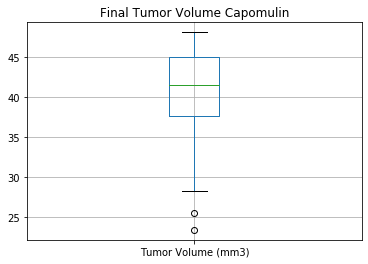

In [14]:
drug_data.boxplot(column=['Tumor Volume (mm3)'])
plt.title("Final Tumor Volume Capomulin")

Text(0.5, 1.0, 'Final Tumor Volume Ramicane')

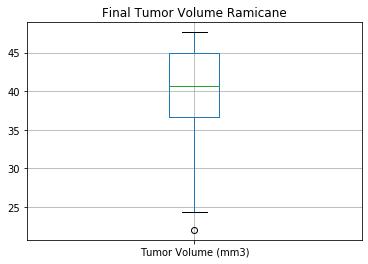

In [15]:
drug_ramicane.boxplot(column=['Tumor Volume (mm3)'])
plt.title("Final Tumor Volume Ramicane")

Text(0.5, 1.0, 'Final Tumor Volume Ceftamin')

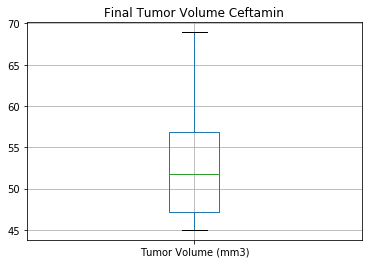

In [16]:
drug_ceftamin.boxplot(column=['Tumor Volume (mm3)'])
plt.title("Final Tumor Volume Ceftamin")

Text(0.5, 1.0, 'Final Tumor Volume Infubinol')

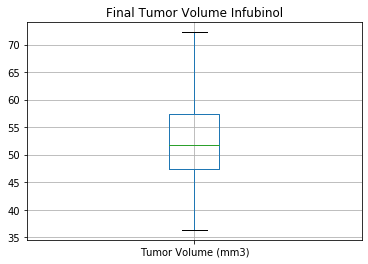

In [17]:
drug_infubinol.boxplot(column=['Tumor Volume (mm3)'])
plt.title("Final Tumor Volume Infubinol")

In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [21]:
k403_data= final_table.loc[final_table['Drug Regimen'] =='Capomulin',['Drug Regimen','Mouse ID','Weight (g)','Tumor Volume (mm3)']]
k403_data

,Drug Regimen,Mouse ID,Weight (g),Tumor Volume (mm3)
10,Capomulin,s185,17,45.000000
11,Capomulin,s185,17,43.878496
12,Capomulin,s185,17,37.614948
13,Capomulin,s185,17,38.177232
14,Capomulin,s185,17,36.866876
...,...,...,...,...
440,Capomulin,i557,24,47.685963
1452,Capomulin,r157,25,45.000000
1453,Capomulin,r157,25,45.597064
1454,Capomulin,r157,25,46.059608


Text(0.5, 1.0, 'Capomulin Effect over time')

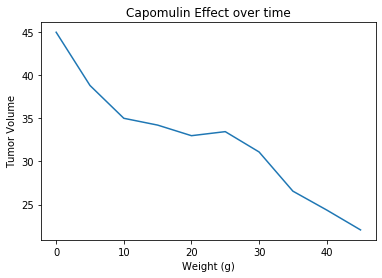

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with CapomulinCapomulin
plt.plot([0,5,10,15,20,25,30,35,40,45], [45, 38.82, 35.01,34.22,32.99,33.46,31.1,26.55,24.36,22.05])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Effect over time")

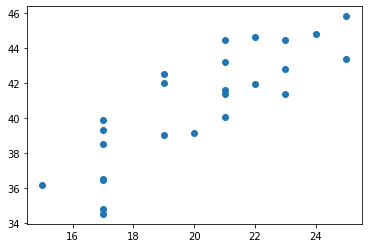

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight= k403_data.groupby("Mouse ID")
weight= weight.mean()
weight
plt.scatter(weight["Weight (g)"], weight["Tumor Volume (mm3)"], marker="o")
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [41]:
weight.corr()


,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [28]:
mw= weight["Weight (g)"]
tumvol= weight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue,stderr) = linregress(mw,tumvol)
intercept


21.552160532685015

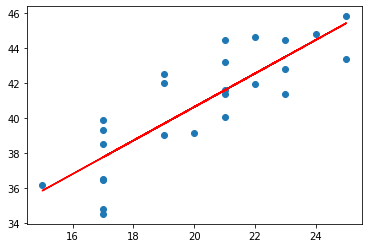

In [29]:
y_values= mw * slope + intercept
y_values    
plt.scatter(weight["Weight (g)"], weight["Tumor Volume (mm3)"], marker="o")
plt.plot(mw, y_values, "r-")

In [30]:

print("the correlation coefficent for mouse weight and average tumor volume for the Capomulin regimen is 0.84")

the correlation coefficent for mouse weight and average tumor volume for the Capomulin regimen is 0.84
